In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [18]:
def ymodel(t,a,b,c):
    
    return a*t + b*np.log(t+c)


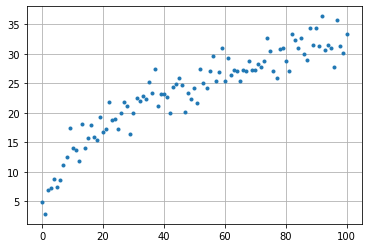

In [34]:
T = 100
dt = 1
Nt = np.int(T/dt)+1
t = np.linspace(0, T, Nt)

# Make some fake data
a = .1
b = 5.
c = 1.
ydata = ymodel(t,a,b,c) + np.random.normal(0., 2., t.shape[0])

plt.plot(t,ydata,'.')
plt.grid()


Here the model we'll try (obviously!) is

$$\tilde{y}(t,a,b,c) = at + b\ln(t+c). $$

The cost function is

$$ C(\mathbf{q}) = \sum_{i=1}^{N} [y_i - \tilde{y}(t_i,\mathbf{q})]^2 $$

where $\mathbf{q} = [a,b,c]$

In [58]:
# Cost function
def cost(ydat,ymod):
    return np.sum( (ydat-ymod)**2 )
    

/opt/conda/envs/mathmod/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


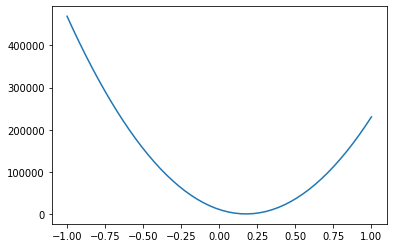

In [80]:
av = np.linspace(-1.,1.,50)
bv = np.linspace(3.,7.,50)
cv = np.linspace(0.,2.,50)

C = np.zeros((50,50,50))

for i in range(50):
    for j in range(50):
        for k in range(50):
            C[i,j,k] = cost(ydata,ymodel(t,av[i],bv[j],cv[k]))



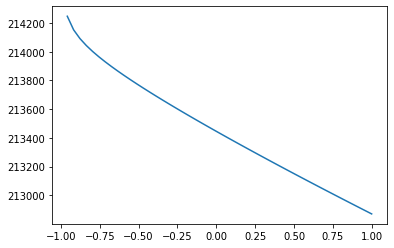

In [83]:
plt.plot(av,C[10,5,:])